<a href="https://colab.research.google.com/github/Musfirah28/Musfirah-Jawed/blob/main/I_BM_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
from google.colab import files

# Upload a single file
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition (1).csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [7]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import random as rn
from functools import reduce

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [8]:
# Read the file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
# Shape of data
df.shape

(1470, 35)

In [9]:
# Data Types of Columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36

# Inspect the structure of the dataframe
df.sample(5).transpose()

,808,698,1236,429,145
Age,29,35,36,46,30
Attrition,No,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,1107,1219,1456,1009,201
Department,Research & Development,Sales,Sales,Research & Development,Research & Development
DistanceFromHome,28,18,13,2,5
Education,4,3,5,3,3
EducationField,Life Sciences,Medical,Marketing,Life Sciences,Technical Degree
EmployeeCount,1,1,1,1,1
EmployeeNumber,1120,975,1733,575,197


In [11]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [12]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [13]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [16]:
#Inspect the state of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [18]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

In [19]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [20]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum()

0

In [21]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
# Check for duplicate observations
df.duplicated().sum()

0

In [23]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [24]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [25]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [26]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [27]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

In [36]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

ValueError: ignored

In [29]:
# Create Feature Dataframe
def table_df(x):
    """
    This function creates dataframe for each feature in the dataset
    """

    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number',
                       '% of Attrition in the Relevant Group']
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100

    return feature

In [31]:
# Create graph for each feature to compare its attrition in the company

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """

    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number',
                       '% of Attrition in the Relevant Group']

    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1,
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False,
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

In [33]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


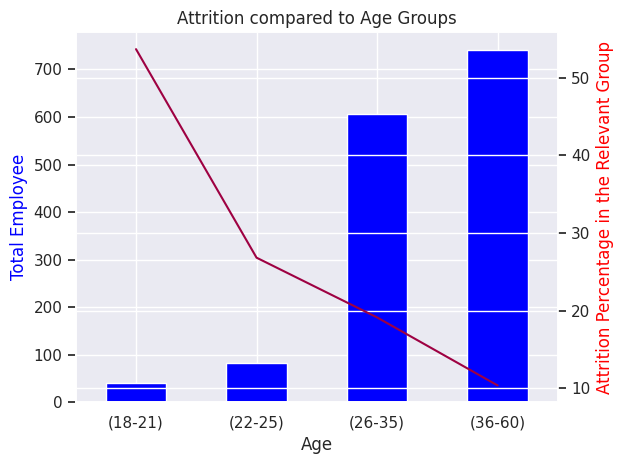

In [35]:
 # Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In [37]:
# Business Travel & Attrition Table
table_df(x = 'BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


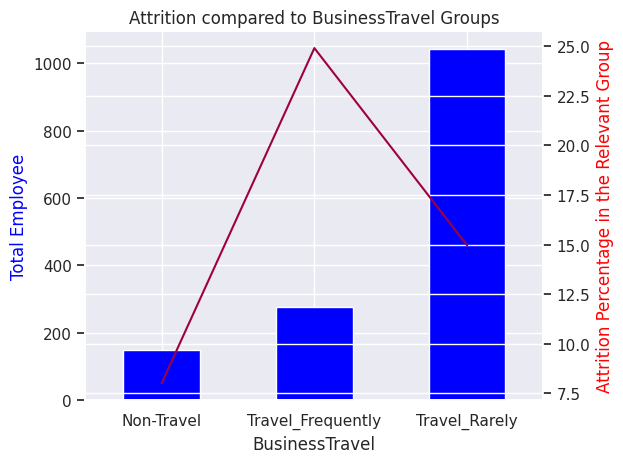

In [38]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

In [39]:
# Department & Attrition Table
table_df(x = 'Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


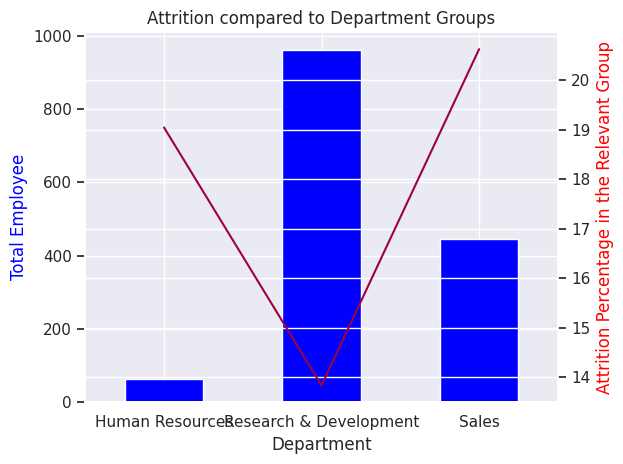

In [40]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

In [41]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


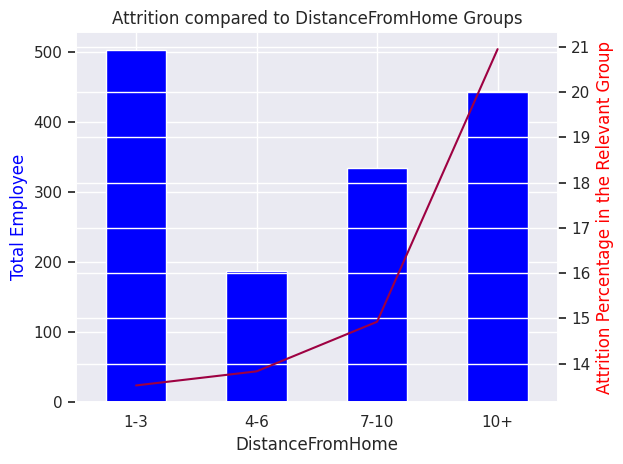

In [42]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

In [43]:
# Labeling education levels
table_df(x = 'Education')
df2['Education'] = df2['Education'].map({1:'Below College', 2:'College',
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


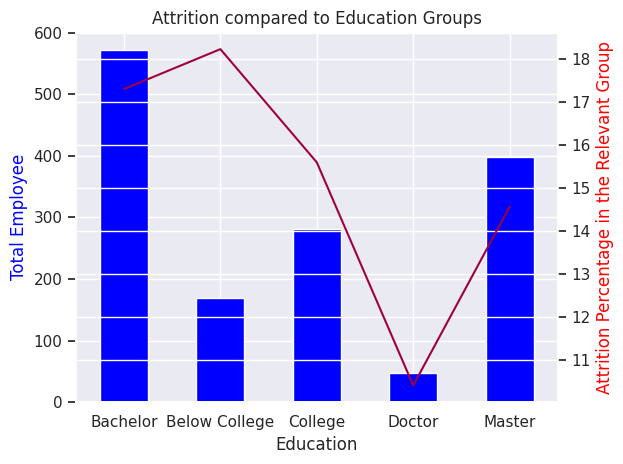

In [44]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

In [45]:
# Education Field & Attrition Table
table_df(x = 'EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


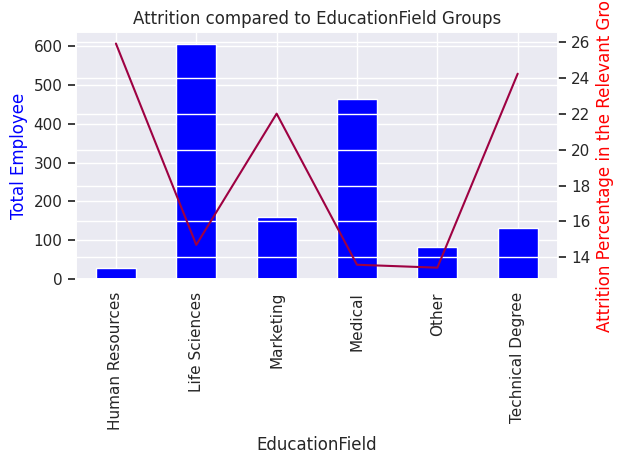

In [46]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

In [47]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium',
                                                                     3:'High', 4:'Very High'})
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


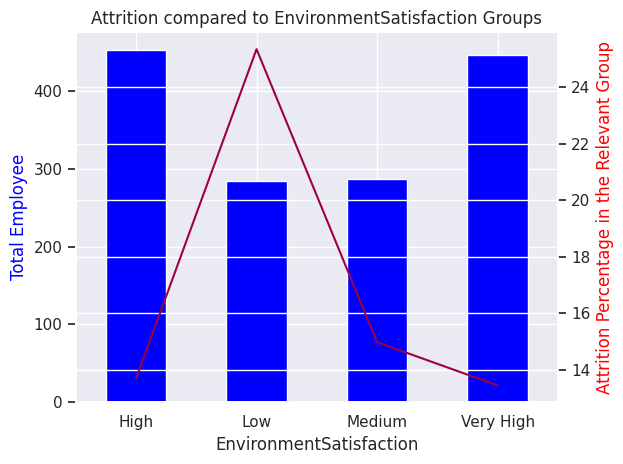

In [48]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

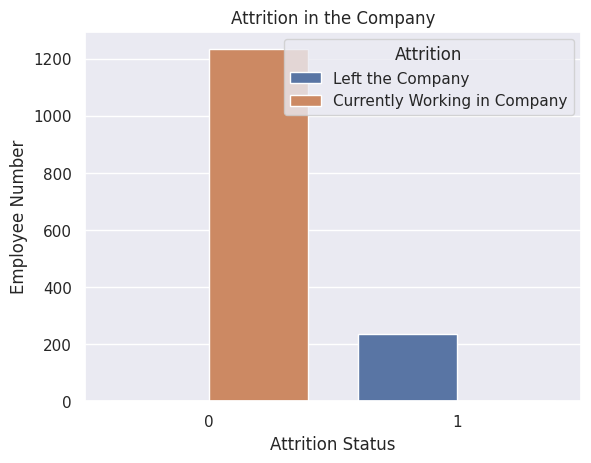

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')

sns.countplot(data=df2, x='Attrition', hue=trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')

plt.show()


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

# Preprocessing: Encode categorical variables and split data
data_encoded = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
data_encoded['Over18'] = data_encoded['Over18'].apply(lambda x: 1 if x == 'Y' else 0)  # Convert 'Y' to 1, 'N' to 0
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8775510204081632
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294



In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess the original dataset
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
data_encoded = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
data_encoded['Over18'] = data_encoded['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Load a new dataset (replace 'WA_Fn-UseC_-HR-Employee-Attrition (1).csv' with your file)
new_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

# Preprocess the new dataset similarly to the original dataset
new_data_encoded = pd.get_dummies(new_data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
new_data_encoded['Over18'] = new_data_encoded['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

# Ensure that columns in the new dataset match the columns used for training
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

# Use the trained model to make predictions on new data
new_predictions = model.predict(new_data_encoded)

# Print the predictions
print("Predictions for new data:")
print(new_predictions)


Predictions for new data:
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


In [58]:
# Mapping predictions to meaningful labels
prediction_labels = ['Currently Working in Company' if pred == 0 else 'Left the Company' for pred in new_predictions]

# Print the predictions with meaningful labels
print("Predictions for new data:")
for i, prediction in enumerate(prediction_labels):
    print(f"Employee {i+1}: {prediction}")


Predictions for new data:
Employee 1: Left the Company
Employee 2: Left the Company
Employee 3: Left the Company
Employee 4: Left the Company
Employee 5: Left the Company
Employee 6: Left the Company
Employee 7: Left the Company
Employee 8: Left the Company
Employee 9: Left the Company
Employee 10: Left the Company
Employee 11: Left the Company
Employee 12: Left the Company
Employee 13: Left the Company
Employee 14: Left the Company
Employee 15: Left the Company
Employee 16: Left the Company
Employee 17: Left the Company
Employee 18: Left the Company
Employee 19: Left the Company
Employee 20: Left the Company
Employee 21: Left the Company
Employee 22: Left the Company
Employee 23: Left the Company
Employee 24: Left the Company
Employee 25: Left the Company
Employee 26: Left the Company
Employee 27: Left the Company
Employee 28: Left the Company
Employee 29: Left the Company
Employee 30: Left the Company
Employee 31: Left the Company
Employee 32: Left the Company
Employee 33: Left the C

In [62]:
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Age: 0.054683000047412646
DailyRate: 0.04817584456262635
DistanceFromHome: 0.042136240524737176
Education: 0.01745650779257818
EmployeeCount: 0.0
EmployeeNumber: 0.0424711678516359
EnvironmentSatisfaction: 0.028901431723209903
HourlyRate: 0.043744820509515954
JobInvolvement: 0.021180200816077775
JobLevel: 0.021510760078637562
JobSatisfaction: 0.026389366141974287
MonthlyIncome: 0.06288381644130417
MonthlyRate: 0.04243369061959821
NumCompaniesWorked: 0.029216188061983
Over18: 0.0
PercentSalaryHike: 0.028990207471179936
PerformanceRating: 0.005194705066325764
RelationshipSatisfaction: 0.021801175766483907
StandardHours: 0.0
StockOptionLevel: 0.027909009727120616
TotalWorkingYears: 0.05029156712437495
TrainingTimesLastYear: 0.021655565598436084
WorkLifeBalance: 0.022735610385001763
YearsAtCompany: 0.039373168092260415
YearsInCurrentRole: 0.023752562086407834
YearsSinceLastPromotion: 0.02167019519976741
YearsWithCurrManager: 0.028982212136301817
BusinessTravel_Non-Travel: 0.003797837347713

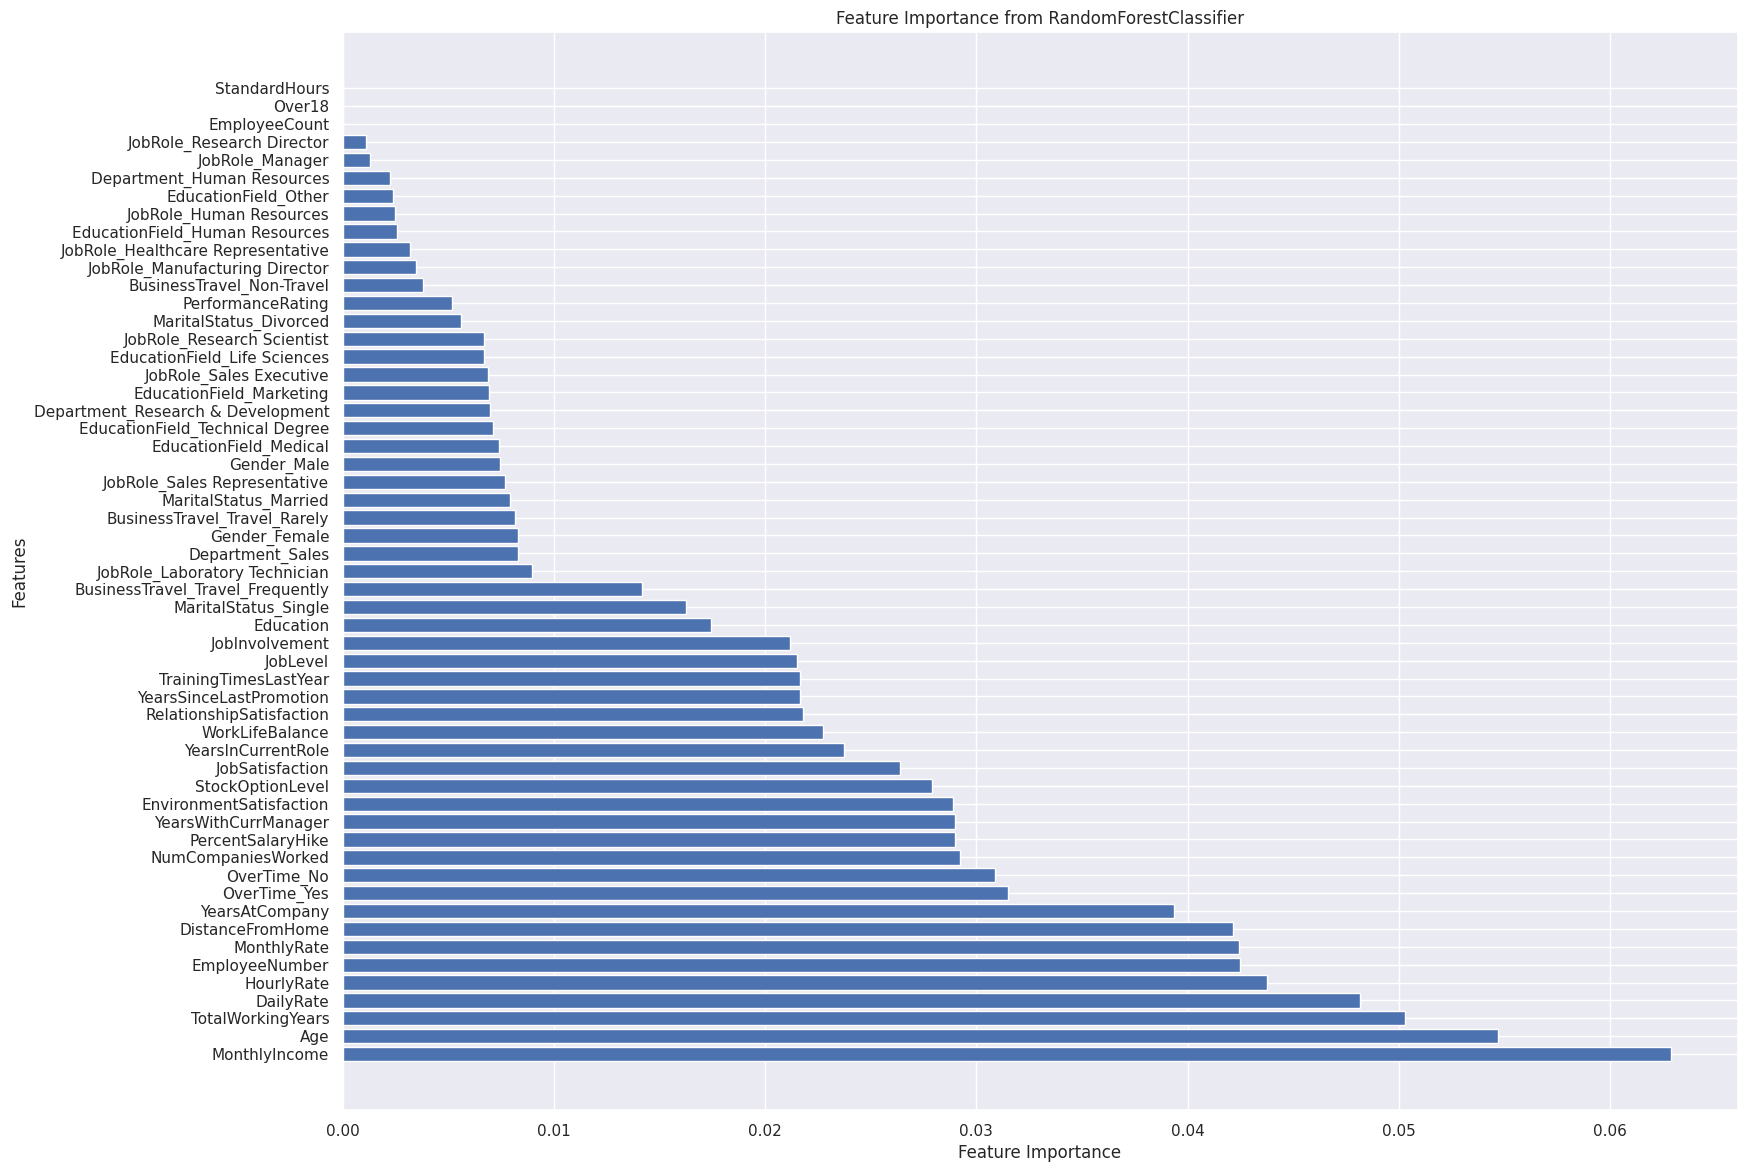

In [64]:
import matplotlib.pyplot as plt

# Calculate feature importance scores
feature_importances = model.feature_importances_
features = X.columns

# Create a dictionary to associate features with importance scores
feature_importance_dict = dict(zip(features, feature_importances))

# Sort the dictionary by importance scores
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Separate the sorted features and their scores
sorted_features, sorted_scores = zip(*sorted_importance)

# Plotting feature importance
plt.figure(figsize=(18, 14))
plt.barh(sorted_features, sorted_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestClassifier')
plt.show()
